In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sqlalchemy import create_engine
from monitor import config

%matplotlib inline

In [13]:
engine = create_engine(config.DB_CONFIG)
with engine.connect() as conn, conn.begin():
    av_pow_query = """
    SELECT DISTINCT ON (date)
        date_trunc('day', time) as date,
        AVG(difficulty) OVER w AS av_diff,
        COUNT(height) OVER w AS sum_blocks
    FROM (
        SELECT * FROM blockchain WHERE flags ~ 'proof-of-work'
    ) pow
    WINDOW w AS (
        PARTITION BY date_trunc('day', time)
    );

    """
    av_pow_data = pd.read_sql_query(av_pow_query, conn)
    av_pow_data.set_index("date", inplace=True)

In [14]:
engine = create_engine(config.DB_CONFIG)
with engine.connect() as conn, conn.begin():
    av_pos_query = """
    SELECT DISTINCT ON (date)
        date_trunc('day', time) as date,
        AVG(difficulty) OVER w AS av_diff,
        COUNT(height) OVER w AS sum_blocks
    FROM (
        SELECT * FROM blockchain
        WHERE flags ~ 'proof-of-stake' AND
        date_trunc('hour', time)::time NOT IN (time'1:00', time'6:00', time'15:00', time'20:00') AND
        mint > 2
    ) pow
    WINDOW w AS (
        PARTITION BY date_trunc('day', time)
    );

    """
    av_pos_data = pd.read_sql_query(av_pos_query, conn)
    av_pos_data.set_index("date", inplace=True)

In [15]:
engine = create_engine(config.DB_CONFIG)
with engine.connect() as conn, conn.begin():
    av_fpos_query = """
    SELECT DISTINCT ON (date)
        date_trunc('day', time) as date,
        AVG(difficulty) OVER w AS av_diff,
        COUNT(height) OVER w AS sum_blocks
    FROM (
        SELECT * FROM blockchain
        WHERE flags ~ 'proof-of-stake' AND
        date_trunc('hour', time)::time IN (time'1:00', time'6:00', time'15:00', time'20:00') AND
        mint > 0.01
    ) pow
    WINDOW w AS (
        PARTITION BY date_trunc('day', time)
    );

    """
    av_fpos_data = pd.read_sql_query(av_fpos_query, conn)
    av_fpos_data.set_index("date", inplace=True)

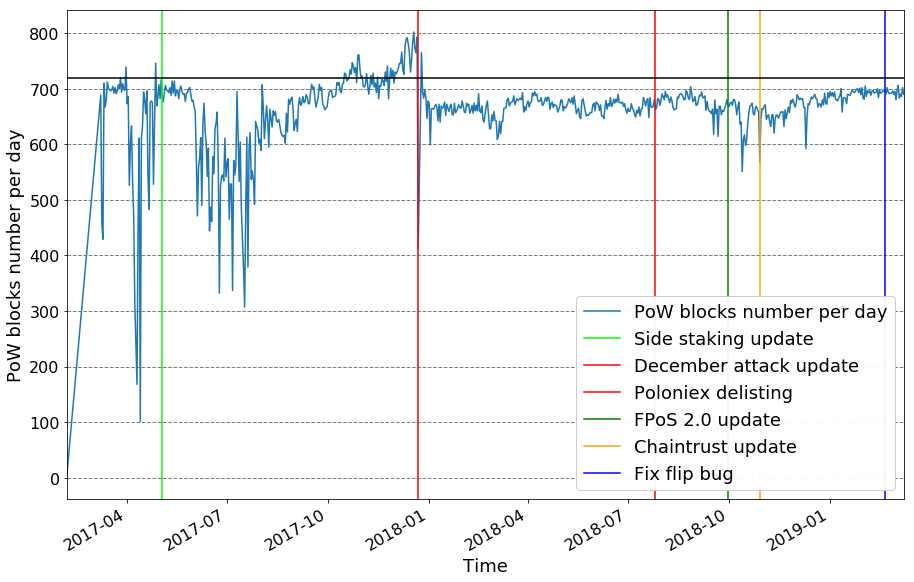

In [16]:
fig = av_pow_data[:-1].plot(
    y="sum_blocks",
    figsize=(15, 10),
    label="PoW blocks number per day"
)
fig = fig.get_figure()
fig.patch.set_alpha(1)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel("PoW blocks number per day", fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 22), ymin=0, ymax=2, color="red", label="December attack update")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 30), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")
plt.axvline(x=datetime(2018, 10, 29), ymin=0, ymax=2, color="orange", label="Chaintrust update")
plt.axvline(x=datetime(2019, 2, 20), ymin=0, ymax=2, color="blue", label="Fix flip bug")

plt.axhline(
    y=24*30,
    xmin=0,
    xmax=1,
    color="black",
)

plt.legend(loc="lower right", framealpha=0.95, prop={"size": 18});

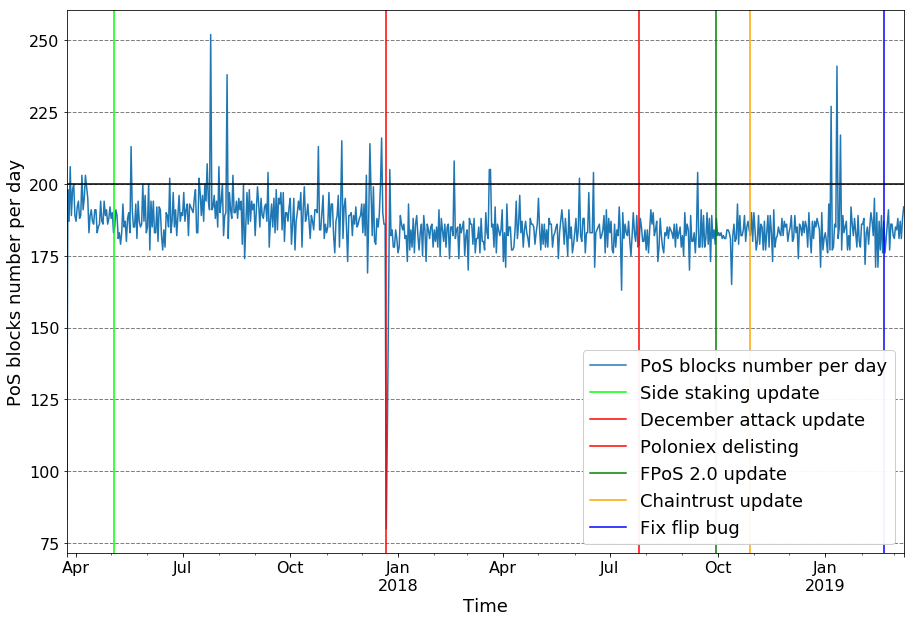

In [17]:
fig = av_pos_data[:-1].plot(
    y="sum_blocks",
    figsize=(15, 10),
    label="PoS blocks number per day"
)
fig = fig.get_figure()
fig.patch.set_alpha(1)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel("PoS blocks number per day", fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 22), ymin=0, ymax=2, color="red", label="December attack update")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 30), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")
plt.axvline(x=datetime(2018, 10, 29), ymin=0, ymax=2, color="orange", label="Chaintrust update")
plt.axvline(x=datetime(2019, 2, 20), ymin=0, ymax=2, color="blue", label="Fix flip bug")

plt.axhline(
    y=20*10,
    xmin=0,
    xmax=1,
    color="black",
)

plt.legend(loc="lower right", framealpha=0.95, prop={"size": 18});

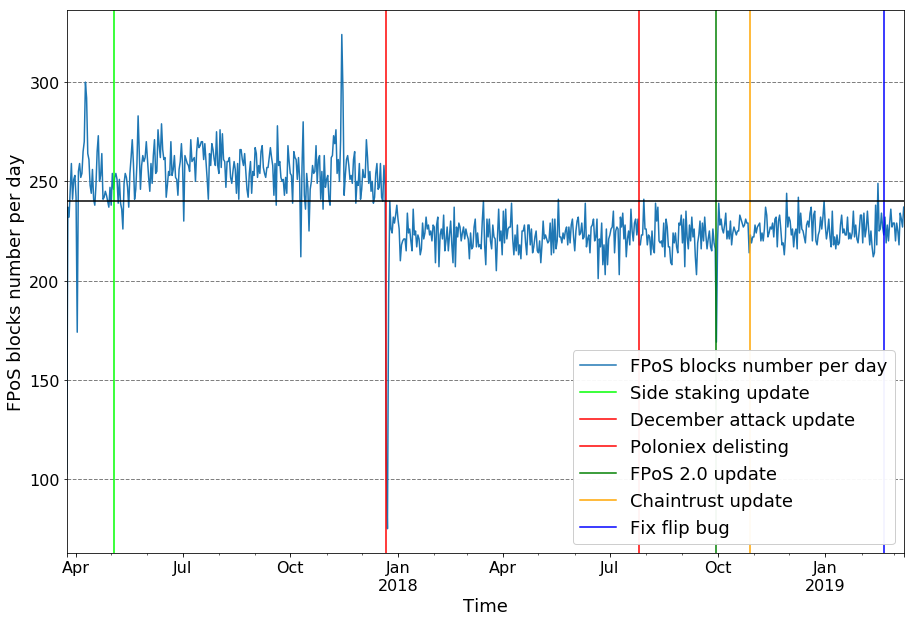

In [18]:
fig = av_fpos_data[:-1].plot(
    y="sum_blocks",
    figsize=(15, 10),
    label="FPoS blocks number per day",
)
fig = fig.get_figure()
fig.patch.set_alpha(1)


ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel("FPoS blocks number per day", fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 22), ymin=0, ymax=2, color="red", label="December attack update")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 30), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")
plt.axvline(x=datetime(2018, 10, 29), ymin=0, ymax=2, color="orange", label="Chaintrust update")
plt.axvline(x=datetime(2019, 2, 20), ymin=0, ymax=2, color="blue", label="Fix flip bug")

plt.axhline(
    y=4*60,
    xmin=0,
    xmax=1,
    color="black",
)

plt.legend(loc="lower right", framealpha=0.95, prop={"size": 18});
fig.savefig("fname", framon=True) # or False

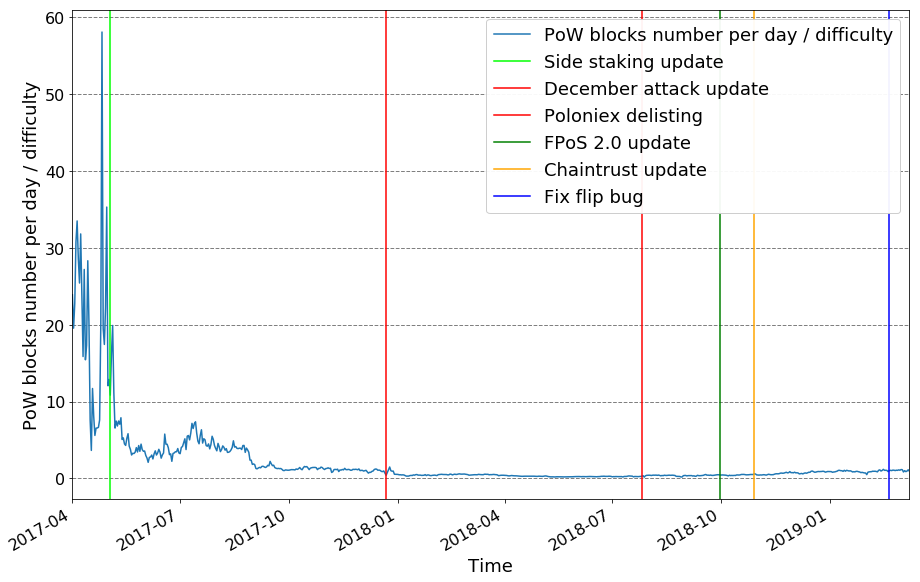

In [19]:
test = av_pow_data["sum_blocks"]/av_pow_data["av_diff"]
fig = test[25:-1].plot(
    y="sum_blocks",
    figsize=(15, 10),
    label="PoW blocks number per day / difficulty"
)
fig = fig.get_figure()
fig.patch.set_alpha(1)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel("PoW blocks number per day / difficulty", fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 22), ymin=0, ymax=2, color="red", label="December attack update")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 30), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")
plt.axvline(x=datetime(2018, 10, 29), ymin=0, ymax=2, color="orange", label="Chaintrust update")
plt.axvline(x=datetime(2019, 2, 20), ymin=0, ymax=2, color="blue", label="Fix flip bug")

plt.legend(loc="upper right", framealpha=0.95, prop={"size": 18});

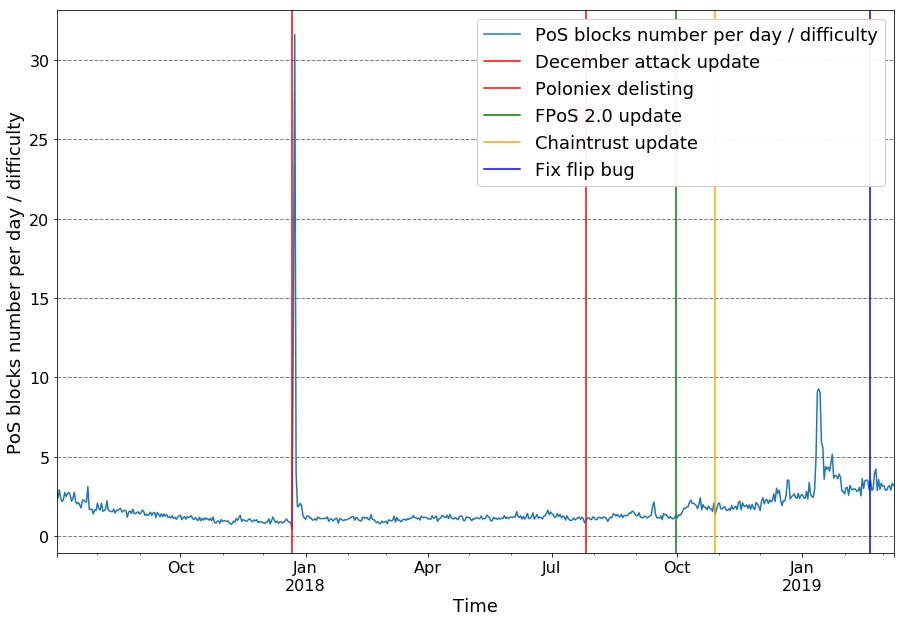

In [20]:
test_pos = av_pos_data["sum_blocks"]/av_pos_data["av_diff"]
fig = test_pos[100:-1].plot(
    y="sum_blocks",
    figsize=(15, 10),
    label="PoS blocks number per day / difficulty"
)
fig = fig.get_figure()
fig.patch.set_alpha(1)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel("PoS blocks number per day / difficulty", fontsize=18)

plt.axvline(x=datetime(2017, 12, 22), ymin=0, ymax=2, color="red", label="December attack update")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 30), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")
plt.axvline(x=datetime(2018, 10, 29), ymin=0, ymax=2, color="orange", label="Chaintrust update")
plt.axvline(x=datetime(2019, 2, 20), ymin=0, ymax=2, color="blue", label="Fix flip bug")

plt.legend(loc="upper right", framealpha=0.95, prop={"size": 18});

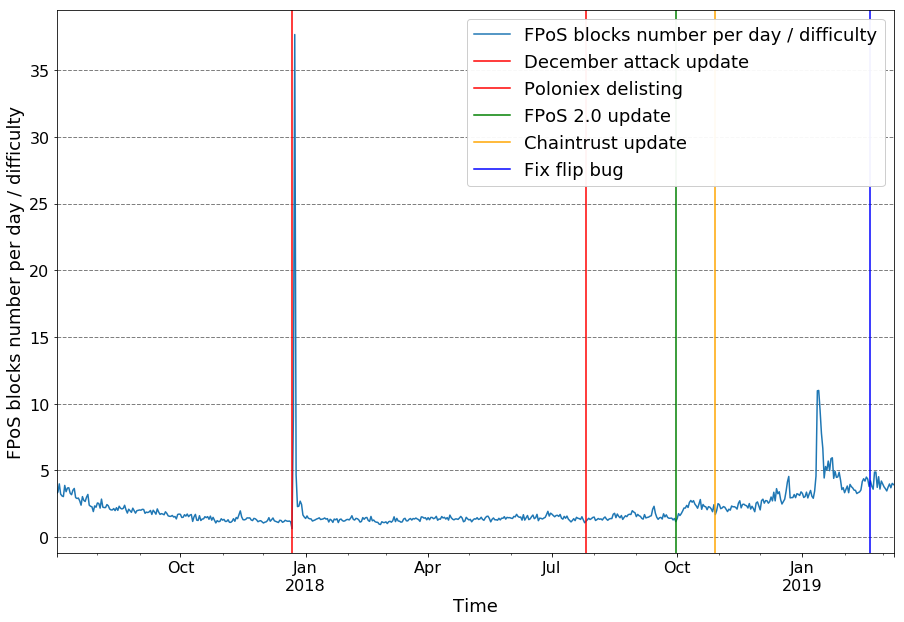

In [21]:
test_fpos = av_fpos_data["sum_blocks"]/av_pos_data["av_diff"]
fig = test_fpos[100:-1].plot(
    y="sum_blocks",
    figsize=(15, 10),
    label="FPoS blocks number per day / difficulty"
)
fig = fig.get_figure()
fig.patch.set_alpha(1)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel("FPoS blocks number per day / difficulty", fontsize=18)

plt.axvline(x=datetime(2017, 12, 22), ymin=0, ymax=2, color="red", label="December attack update")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 30), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")
plt.axvline(x=datetime(2018, 10, 29), ymin=0, ymax=2, color="orange", label="Chaintrust update")
plt.axvline(x=datetime(2019, 2, 20), ymin=0, ymax=2, color="blue", label="Fix flip bug")

plt.legend(loc="upper right", framealpha=0.95, prop={"size": 18});